In [5]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = "../data/processed/modeling_dataset.parquet"

df = pd.read_parquet(DATA_PATH)

df = df.sort_values(["ticker", "datetime"]).reset_index(drop=True)

print(df.shape)
print(df["ticker"].unique())
df.head()

(2355, 9)
<ArrowStringArray>
['AMD', 'CRSP', 'NOW', 'ONDS', 'OSS']
Length: 5, dtype: str


,ticker,datetime,close,ret_1d,ret_5d,vol_20d,vol_z_20d,fwd_ret,label
0,AMD,2024-03-19 04:00:00,181.42,-0.048413,-0.105248,0.041377,0.345259,-0.019568,0
1,AMD,2024-03-20 04:00:00,179.73,-0.009315,-0.077314,0.041393,0.205302,-0.000779,0
2,AMD,2024-03-21 04:00:00,178.68,-0.005842,-0.044798,0.033802,-0.032974,0.010130,1
3,AMD,2024-03-22 04:00:00,179.65,0.005429,-0.059719,0.033118,-0.806393,0.020540,1
4,AMD,2024-03-25 04:00:00,178.63,-0.005678,-0.063047,0.033143,-0.233182,0.000392,0


In [6]:
# Ticker specific exploration
ticker = "OSS"
dft = df[df["ticker"] == ticker].copy()

print(dft.shape)
dft.head()

(471, 9)


,ticker,datetime,close,ret_1d,ret_5d,vol_20d,vol_z_20d,fwd_ret,label
1884,OSS,2024-03-19 04:00:00,3.64,-0.026738,0.022472,0.096651,-0.357951,-0.087912,0
1885,OSS,2024-03-20 04:00:00,3.31,-0.090659,-0.105405,0.096947,-0.165465,-0.036254,0
1886,OSS,2024-03-21 04:00:00,3.33,0.006042,-0.095109,0.067531,0.936110,-0.021021,0
1887,OSS,2024-03-22 04:00:00,3.24,-0.027027,-0.169231,0.066560,-0.274625,-0.015432,0
1888,OSS,2024-03-25 04:00:00,3.36,0.037037,-0.101604,0.065189,1.335994,-0.065476,0


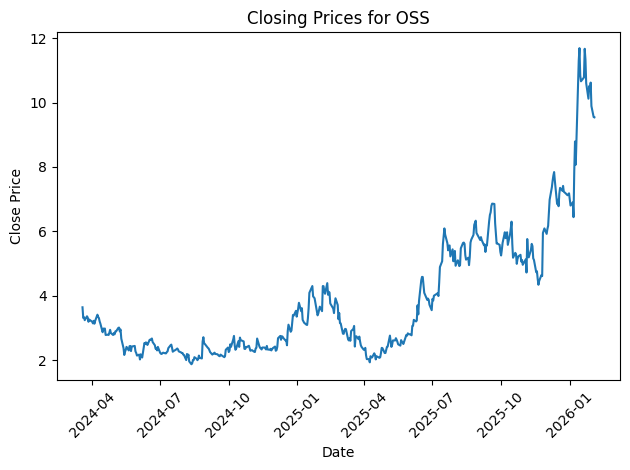

In [7]:
# Plot 1: Closing price over time for a single ticker
plt.figure()
plt.plot(dft["datetime"], dft["close"])
plt.title(f"Closing Prices for {ticker}")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

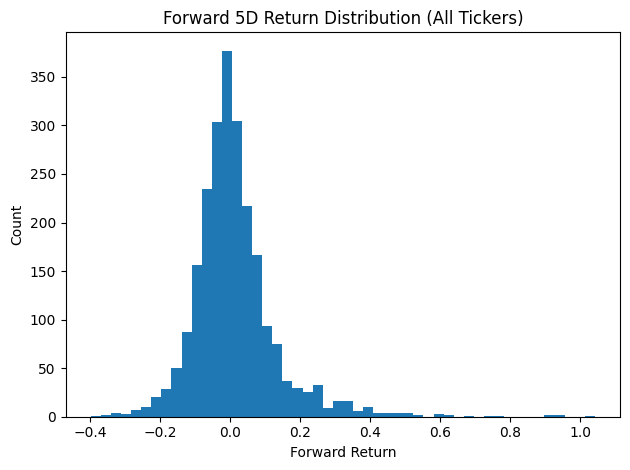

In [8]:
# Plot 2: Forward return distribution for all tickers
plt.figure()
plt.hist(df["fwd_ret"], bins=50)
plt.title("Forward 5D Return Distribution (All Tickers)")
plt.xlabel("Forward Return")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

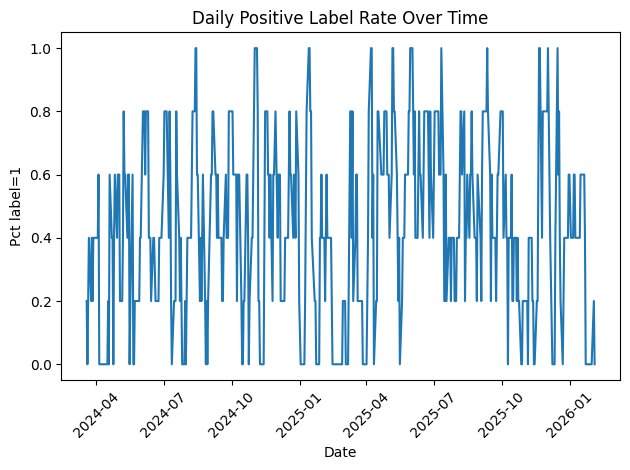

In [ ]:
# Plot 3: Label rate over time (all tickers)
# Group by date: percent of rows labeled 1 each day
daily_label_rate = df.groupby("datetime")["label"].mean() 

plt.figure()
plt.plot(daily_label_rate.index, daily_label_rate.values)
plt.title("Daily Positive Label Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Pct label=1")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


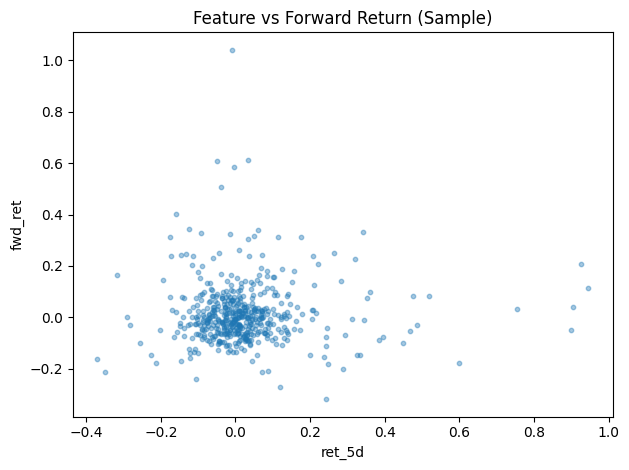

In [10]:
# Plot 4: Feature vs forward return scatter (sample to reduce overplotting)
sample = df.sample(n=min(500, len(df)), random_state=42)
x = sample["ret_5d"]     
y = sample["fwd_ret"]    

plt.figure()
plt.scatter(x, y, s=10, alpha=0.4)
plt.title("Feature vs Forward Return (Sample)")
plt.xlabel("ret_5d")
plt.ylabel("fwd_ret")
plt.tight_layout()
plt.show()
